In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"D:\OneDrive\Desktop\First Semester\MrM Research\Coding\Data\Linear Regression Dataset\CarPrices\CarPrice_Assignment.csv")
x=data["horsepower"]
y=data["price"]
#y=mx+b
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()

# Convert to 0-1 range
x_scaled = (x - x_min) / (x_max - x_min)
y_scaled = (y - y_min) / (y_max - y_min)
m=0
b=0
L=0.1 #learning rate
epochs=750
n=x.shape[0]
error=[]
m_v=[]
for i in range(epochs):
    y_dash=m*x_scaled + b
    squared_errors=(y_dash-y_scaled)**2
    mse=np.mean(squared_errors)/2
    error.append(mse)
    D_m = np.mean(x_scaled * (y_dash-y_scaled))  # Derivative wrt m
    D_b = np.mean(y_dash-y_scaled)       # Derivative wrt b
    m = m - L * D_m
    b = b - L * D_b
    m_v.append(m)
y_pred_final = m * x_scaled + b
#plt.scatter(x_scaled, y_scaled, color='blue')
#plt.plot(x_scaled, y_pred_final, color='red')



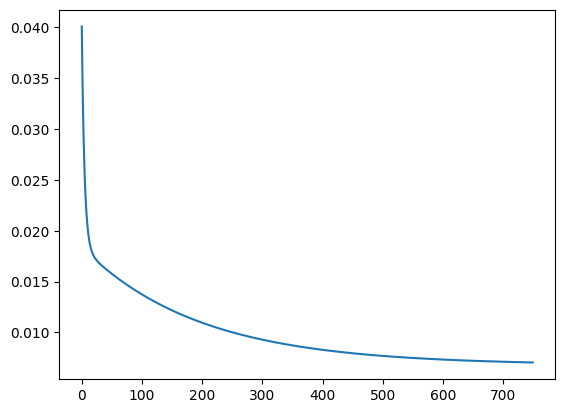

In [184]:
plt.plot(range(epochs), error)

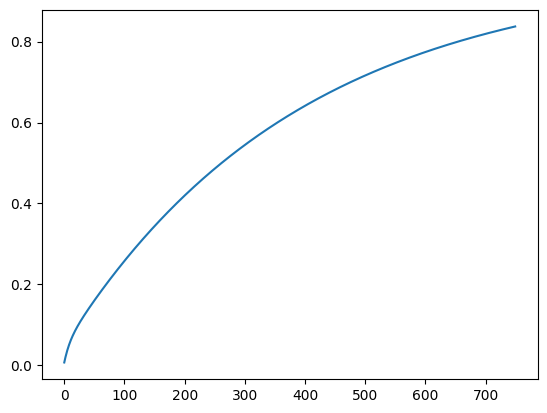

In [189]:
plt.plot(range(epochs), m_v)